## <p style="text-align: center;"><b><font color='blue'>Stock Return Analysis using R</font></b></p>
<br/>
<u><b>Learnings:</b></u>
<ol type="1">
<li>Simple Return</li>
<li>Log Returns</li>
<li>Statistical Distributions</li>
<li>Financial data plotting</li>
</ol>

In [2]:
library("quantmod")

In [4]:
library(fBasics)

#### <font color='blue'>Apple stock exploration</font>

In [8]:
getSymbols("AAPL",from="2007-01-03",to="2011-12-02")

[1] "AAPL"

* Log Return

In [9]:
AAPL.rtn <- diff(log(AAPL$AAPL.Adjusted))

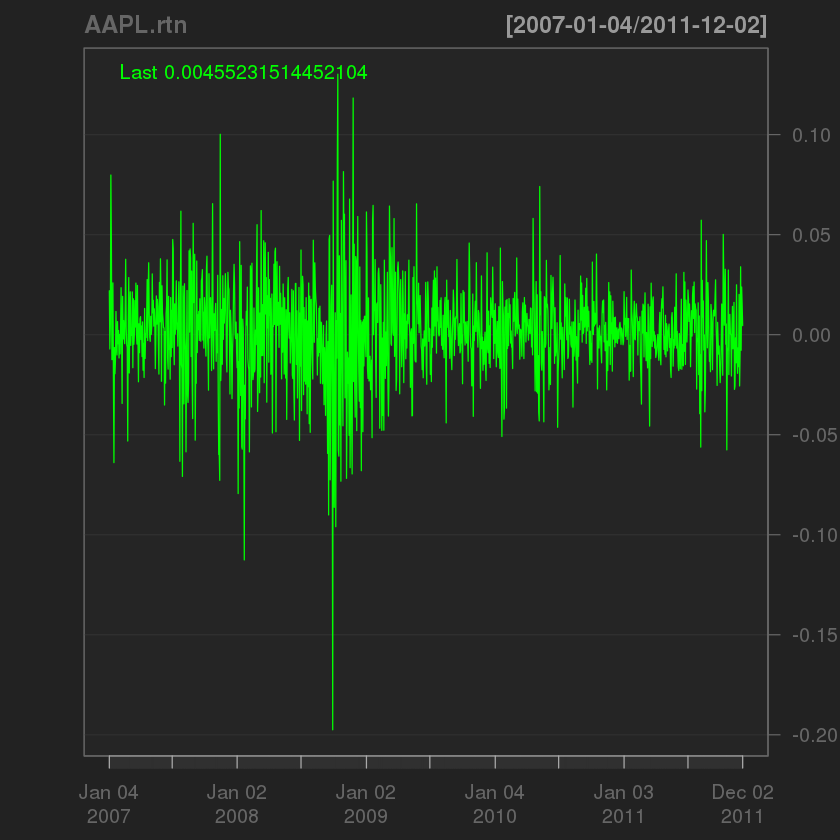

In [10]:
chartSeries(AAPL.rtn)

### <font color='blue'> Let's play around 3M stock data </font>

In [14]:
da=read.table("d-mmm-0111.txt",header=T)

In [15]:
head(da)

,date,rtn
1,20010102,-0.010892
2,20010103,-0.011536
3,20010104,0.01008
4,20010105,-0.03729
5,20010108,0.006001
6,20010109,-0.015727


In [16]:
mmm=da[,2] #Obtain 3M simple returns

In [17]:
basicStats(mmm) #Compute summary statistics

,mmm
nobs,2704
NAs,0
Minimum,-0.089569
Maximum,0.098784
1. Quartile,-0.007161
3. Quartile,0.007987
Mean,0.000278
Median,0.00035
Sum,0.751082
SE Mean,0.000298


If X is a normal random variable, then S(x ) and K(x ) − 3 are distributed asymptotically as normal with zero mean and variances 6/T and 24/T, respectively

**Let's perfom t test for**

* Mean of return is 0
* 0 skewness
* Excess kuttosis (the daily simple returns of 3M stock have heavy tails)

In [18]:
#Simple tests
t.test(mmm)


	One Sample t-test

data:  mmm
t = 0.93258, df = 2703, p-value = 0.3511
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0003062688  0.0008618028
sample estimates:
  mean of x 
0.000277767 


In [19]:
s3 <- skewness(mmm)
T <-length(mmm) # Sample size
t3 <- s3/sqrt(6/T) # Skewness test
pp <- 2*(1-pnorm(t3)) # Compute p-value

paste("P value for skewness [", pp, "]. Cannot reject null hypotesis for skewness.")

[1] "P value for skewness [ 0.552958346518353 ]. Cannot reject null hypotesis for skewness."

In [20]:
s4 <- kurtosis(mmm)
t4 <- s4/sqrt(24/T) # Kurtosis test

paste("P value for excess kurtosis is [", 2*(1-pnorm(t4)), "], which is very less. Cann reject null hypotesis for excess kurtosis.")

[1] "P value for excess kurtosis is [ 0 ], which is very less. Cann reject null hypotesis for excess kurtosis."

**<font color='blue'>Jarque - Bera Normalality Test </font>**

In [21]:
normalTest(mmm, method = 'jb')


Title:
 Jarque - Bera Normalality Test

Test Results:
  STATISTIC:
    X-squared: 2422.4384
  P VALUE:
    Asymptotic p Value: < 2.2e-16 

Description:
 Sat Apr 30 16:32:27 2016 by user: 


From above, we can Reject normality

### <font color='red'>Data Visualization </font>

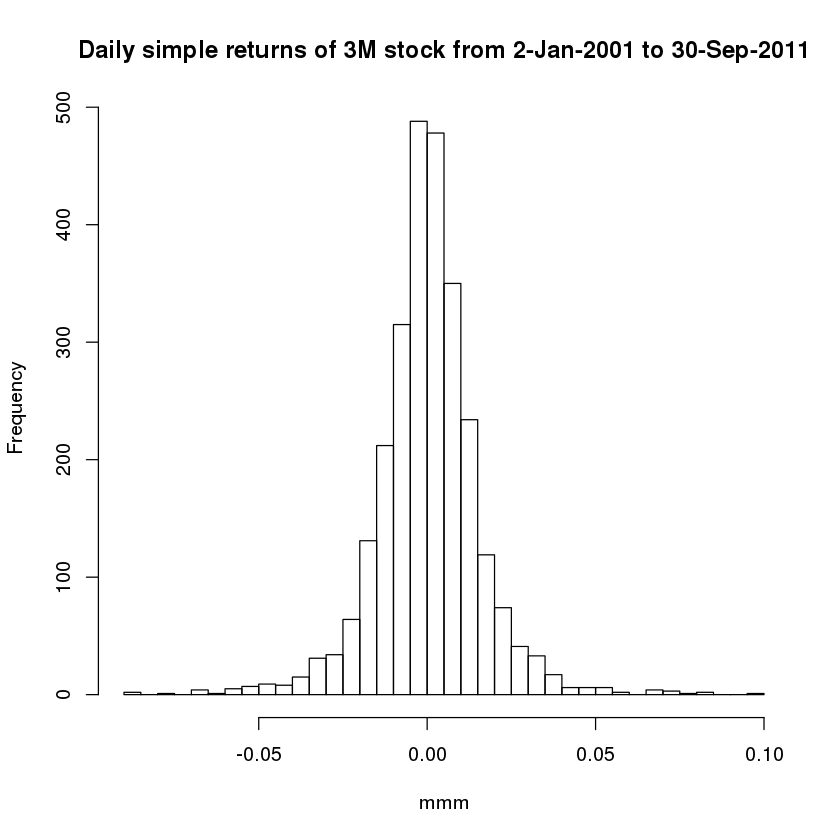

In [22]:
#Histogram
hist(mmm,nclass=30,  main= "Daily simple returns of 3M stock from 2-Jan-2001 to 30-Sep-2011") 

In [24]:
# Obtain density estimate
d1=density(mmm) 
range(mmm)

[1] -0.089569  0.098784

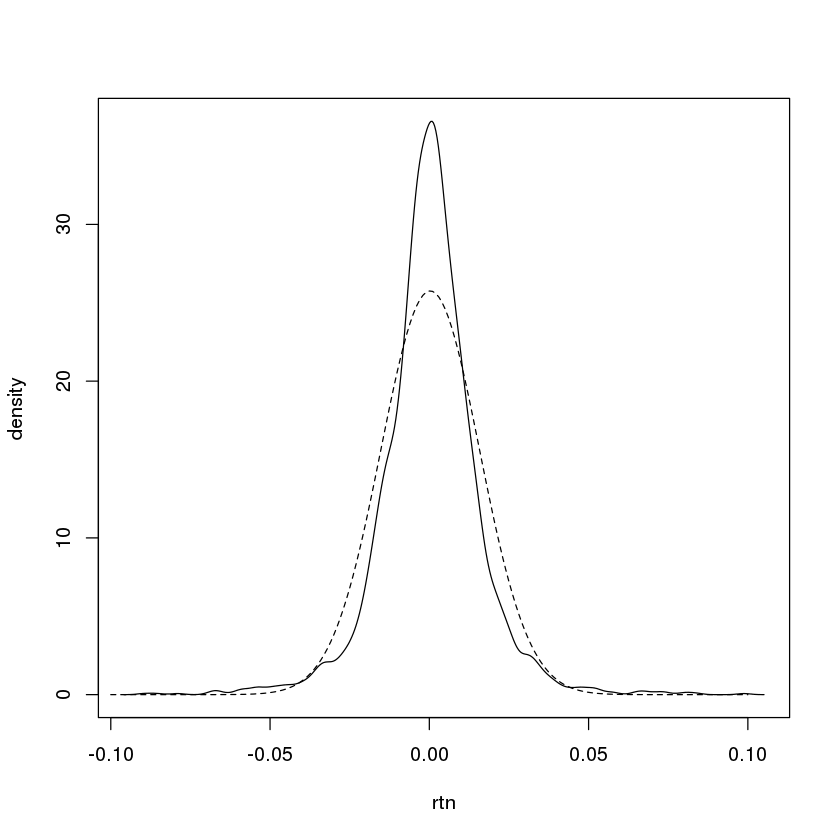

In [25]:
# Create a sequence of x with increment 0.001.
x=seq(-.1, .1, .001)
# Create normal density
y1=dnorm(x, mean(mmm), stdev(mmm))
plot(d1$x, d1$y, xlab='rtn', ylab='density', type='l')
lines(x,y1,lty=2)

In the figure above, the solid line shows the empirical density function of the 3M returns. This is obtained by a nonparametric smoothing method. The empirical density function can be regarded as a refined version of the histogram. The dashed line shows the density function of a normal distribution that has the same mean and standard deviation as those of the 3M data. The plot provides a visual inspection of the normality assumption for the daily 3M simple returns. The empirical density function has a higher peak and longer tails than the normal density. This phenomenon is common for daily stock returns. In general, the deviation between the solid and dashed line indicates that the daily simple returns of 3M stock are not normally distributed. This, again, is consistent with the result of normality test shown above.

<font color='blue'> Bar chart for daily Apple stock prices from January 3 to June 30, 2011. The vertical bar shows the daily price range, the left horizontal line gives the opening price, and the right horizontal line denotes the closing price.</font>

[1] "AAPL"

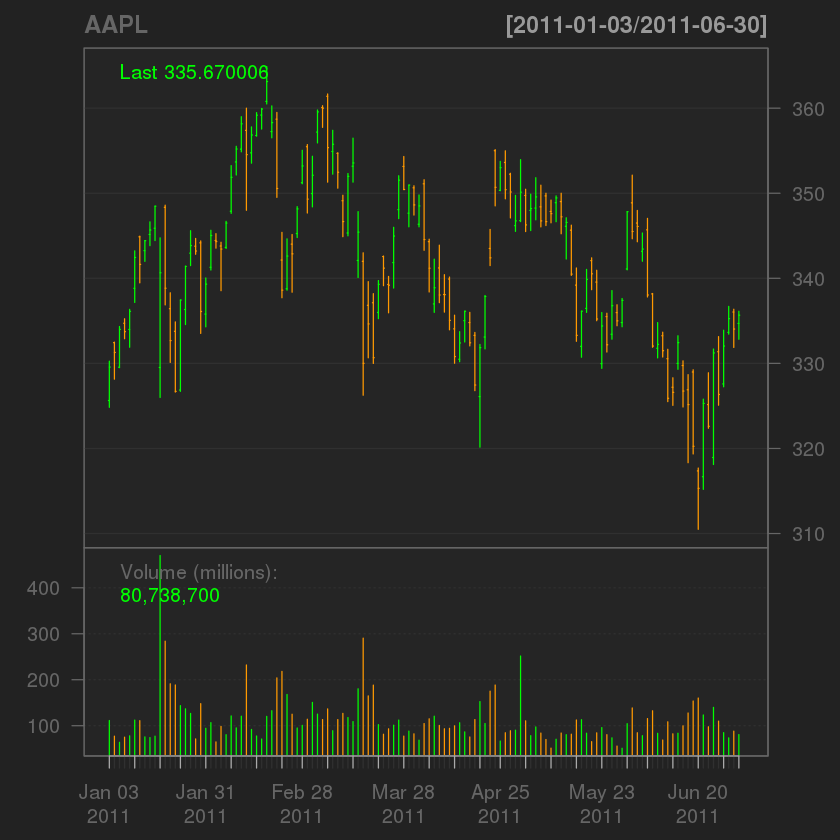

In [26]:
getSymbols("AAPL", from="2011-01-03", to="2011-06-30")
barChart(AAPL, bar.type = 'ohlc')

<font color='blue'>Draw 21 days MA. The use of 21 days is arbitrary; it is roughly the number of trading days in a month. The moving-average chart provides information about stock price relative to its recent history. In statistics, averaging is a simple way to reduce the random variability.</font>

[1] "AAPL"

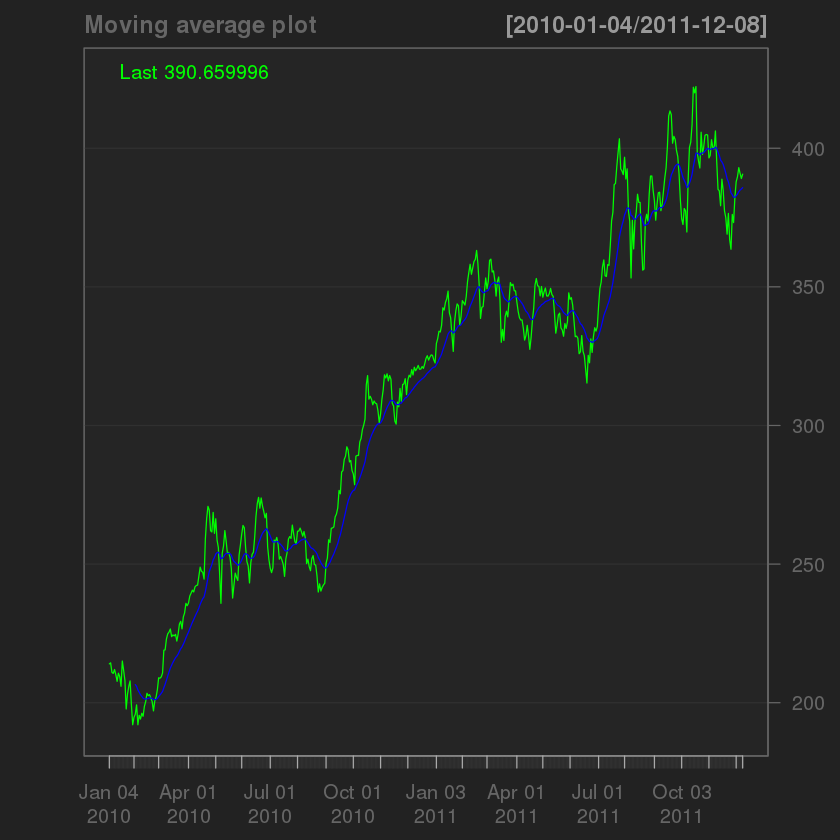

In [28]:
getSymbols("AAPL",from="2010-01-02",to="2011-12-08")
chartSeries(AAPL, type = "line", TA = "addEMA(21)", name= 'Moving average plot')

#### <font color="red">Corellation between stocks</font>

In [19]:
da=read.table("m-ibmsp-2611.txt",header=T)
head(da)

,data,ibm,sp
1,19260130,-0.010381,0.022472
2,19260227,-0.024476,-0.043956
3,19260331,-0.115591,-0.059113
4,19260430,0.089783,0.022688
5,19260528,0.036932,0.007679
6,19260630,0.068493,0.043184


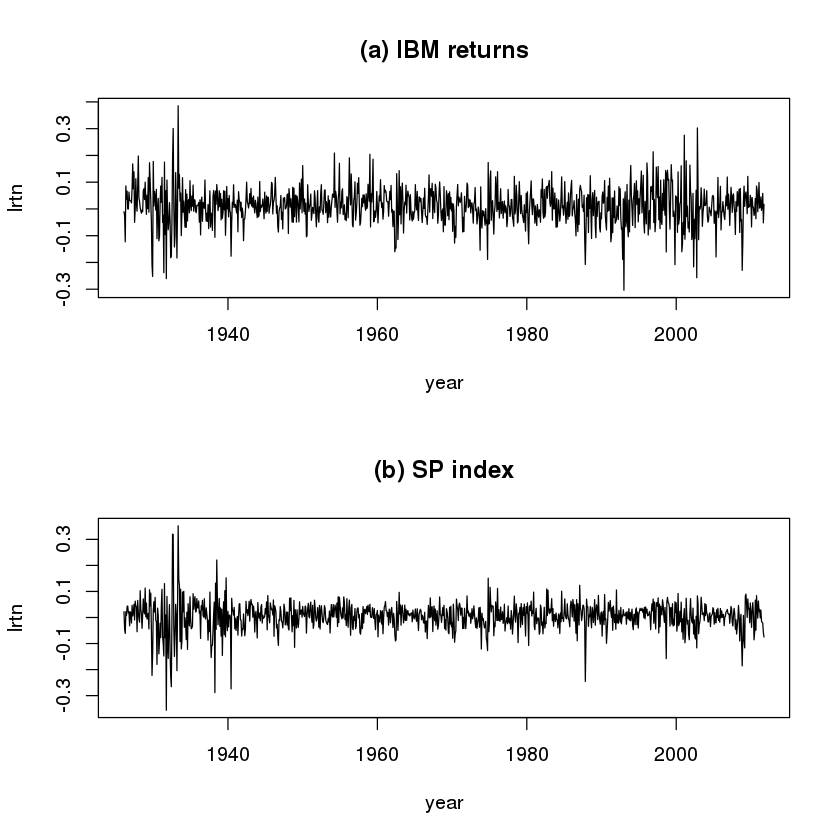

In [20]:
#Tranform into log returns
ibm=log(da$ibm+1)
sp=log(da$sp+1)
tdx=c(1:nrow(da))/12+1926 #Create time index
par(mfcol=c(2,1))
plot(tdx,ibm,xlab='year',ylab='lrtn',type='l')
title(main='(a) IBM returns')
plot(tdx,sp,xlab='year', ylab='lrtn', type='l') #X-axis first.
title(main='(b) SP index')

In [21]:
cor(ibm,sp) # Obtain sample correlation
# Fit the Market Model (linear model)
m1=lm(ibm ~ sp) 
summary(m1)

[1] 0.6409642


Call:
lm(formula = ibm ~ sp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31956 -0.03122 -0.00108  0.03116  0.24061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.007768   0.001672   4.645 3.84e-06 ***
sp          0.806685   0.030144  26.761  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.05348 on 1027 degrees of freedom
Multiple R-squared:  0.4108,	Adjusted R-squared:  0.4103 
F-statistic: 716.1 on 1 and 1027 DF,  p-value: < 2.2e-16


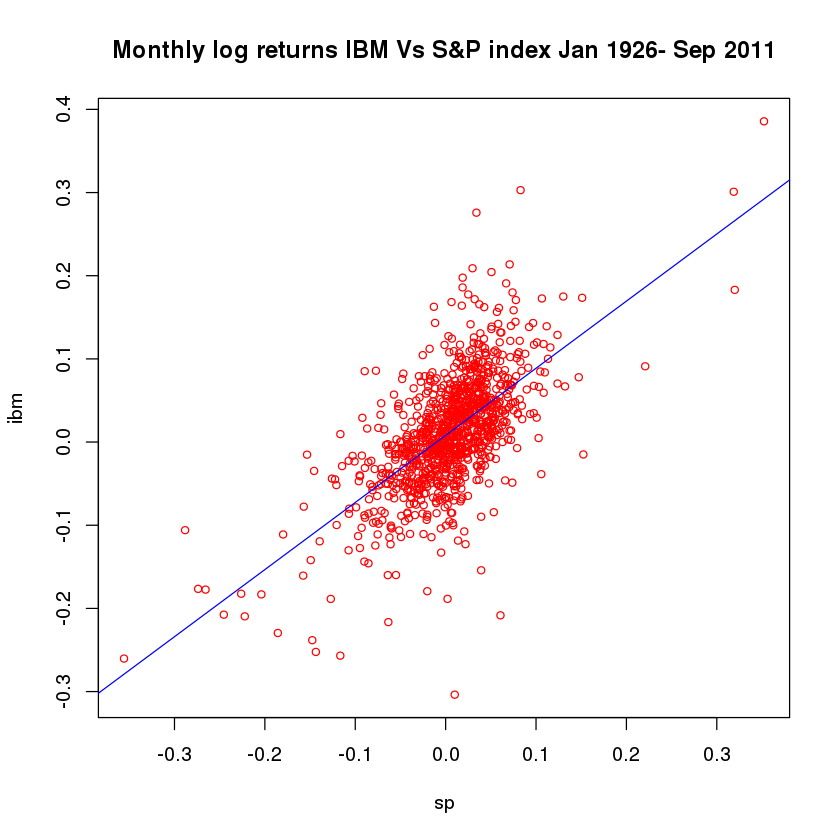

In [22]:
plot(sp, ibm, cex=0.8, col = "red") # Obtain scatter plot
title("Monthly log returns IBM Vs S&P index Jan 1926- Sep 2011")
abline(0.008,.807, col = "blue") #Add the linear regression line

**<font color='blue'>From the above plot, it is clear that, as expected, IBM and market returns have a positive relationship. This linear relationship can be measured by the correlation between the two returns.</font>**

**<p style="text-align: center;"><font color='red'><u>STATISTICAL DISTRIBUTIONS</u></font></p>**
* <u><b>Normal Distribution:</b></u>
A traditional assumption made in financial study is that the simple returns {R it |t = 1, · · · , T } are independently and identically distributed (iid) as normal with fixed mean and variance. This assumption makes statistical properties of asset returns tractable. But it encounters several difficulties. First, the lower bound of a simple return is −1.Yet the normal distribution may assume any value in the real line and, hence, has no lower bound. Second, if R it is normally distributed, then the multiperiod simple return R it [k ] is not normally distributed because it is a product of one-period returns. Third, the normality assumption is not supported by many empirical asset returns, which
tend to have a positive excess kurtosis.

<br/><br/>
Consider the daily simple returns of American Express (AXP), CRSP value weighted index (VW), CRSP equal-weighted index (EW), and the S&P composite index (SP) from September 01, 2001 to September 30, 2011. Returns of indices include dividends. The data are in the file d-axp3dx-0111.txt (date, axp, vw, ew, sp).
<br/>
(a) Compute the sample mean, standard deviation, skewness, excess kurtosis,minimum, and maximum of each simple return series.
<br/>
(b) Transform the simple returns to log returns. Compute the sample mean, standard deviation, skewness, excess kurtosis, minimum, and maximum of each log return series.
<br/>
(c) Test the null hypothesis that the mean of the log returns of AXP stock is zero. Use 5% significance level to draw your conclusion.

In [23]:
#Load data
da <-read.table('d-axp3dx-0111.txt', header = T)
head(da)

,date,axp,vw,ew,sp
1,20010904,0.000824,-0.001658,-0.005708,-0.000565
2,20010905,0.007682,-0.003242,-0.008926,-0.001059
3,20010906,-0.039477,-0.020733,-0.014187,-0.02239
4,20010907,-0.019274,-0.017769,-0.011476,-0.018637
5,20010910,0.01185,0.003513,-0.007368,0.006226
6,20010917,-0.135961,-0.050714,-0.042398,-0.049216


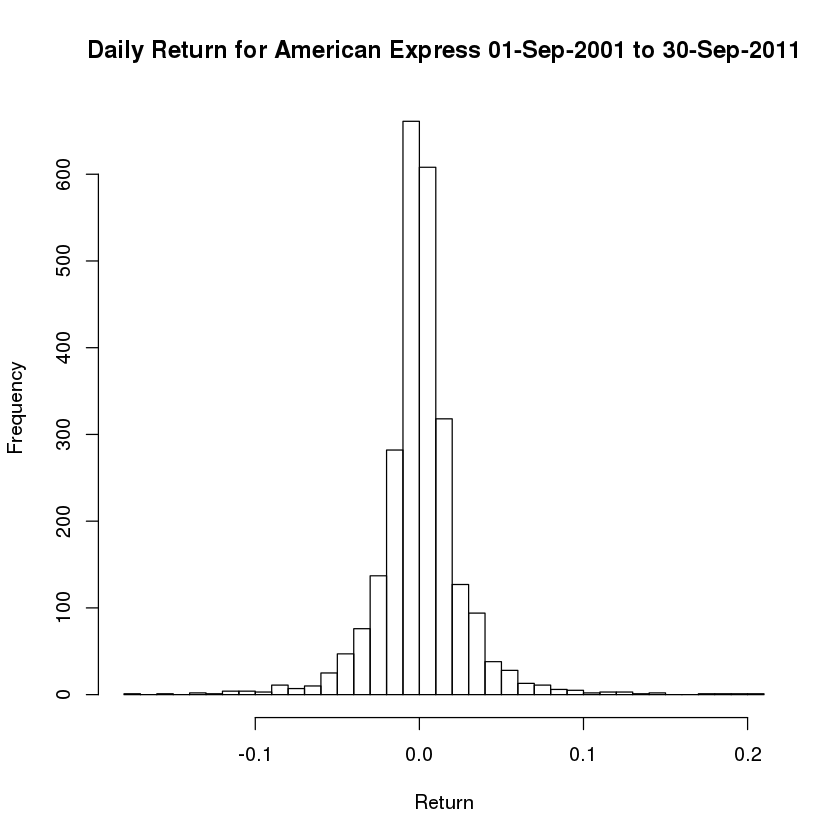

In [24]:
hist(da$axp, nclass=30, main = "Daily Return for American Express 01-Sep-2001 to 30-Sep-2011", xlab = 'Return')

In [25]:
basicStats(da$axp)

,X..da.axp
nobs,2535
NAs,0
Minimum,-0.175949
Maximum,0.206485
1. Quartile,-0.009672
3. Quartile,0.01054
Mean,0.000534
Median,0
Sum,1.35356
SE Mean,0.000524


In [26]:
#Tranform into log returns
axp_log_ret <- log(da$axp + 1)

In [27]:
basicStats(axp_log_ret)

,axp_log_ret
nobs,2535
NAs,0
Minimum,-0.193523
Maximum,0.187711
1. Quartile,-0.009719
3. Quartile,0.010484
Mean,0.000188
Median,0
Sum,0.476584
SE Mean,0.000522


In [28]:
t.test(da$axp)


	One Sample t-test

data:  da$axp
t = 1.0195, df = 2534, p-value = 0.308
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0004930041  0.0015609015
sample estimates:
   mean of x 
0.0005339487 


In [29]:
d1=density(da$axp) 
range(da$axp)

[1] -0.175949  0.206485

Warning message:
In mean.default(da$axp): argument is not numeric or logical: returning NA

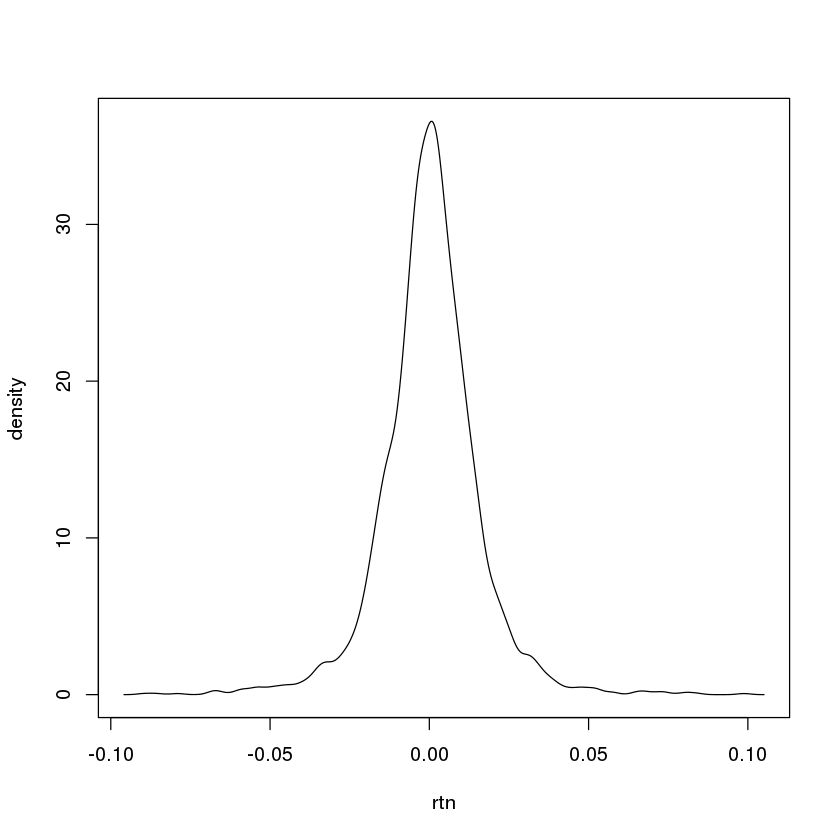

In [34]:
x=seq(-.2, .2, .001)
y1=dnorm(x, mean(da$axp), stdev(da$axp))
plot(d1$x, d1$y, xlab='rtn', ylab='density', type='l')
lines(x,y1,lty=2)